In [49]:
import pandas.util.testing as tm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [54]:
df = pd.read_csv('US_accident_cleaned')
df.head()

Source    TMC  Severity  Start_Lng  Start_Lat  Distance(mi) Side  \
0  MapQuest  201.0       3.0 -84.058723  39.865147          0.01    R   
1  MapQuest  201.0       2.0 -82.831184  39.928059          0.01    L   
2  MapQuest  201.0       2.0 -84.032608  39.063148          0.01    R   
3  MapQuest  201.0       3.0 -84.205582  39.747753          0.01    R   
4  MapQuest  201.0       2.0 -84.188354  39.627781          0.01    R   

           City      County State  ... Roundabout  Station  Stop  \
0        Dayton  Montgomery    OH  ...        0.0      0.0   0.0   
1  Reynoldsburg    Franklin    OH  ...        0.0      0.0   0.0   
2  Williamsburg    Clermont    OH  ...        0.0      0.0   0.0   
3        Dayton  Montgomery    OH  ...        0.0      0.0   0.0   
4        Dayton  Montgomery    OH  ...        0.0      0.0   0.0   

   Traffic_Calming  Traffic_Signal Turning_Loop Sunrise_Sunset  Hour  Weekday  \
0              0.0             0.0          0.0          Night   5.0      Mon   
1              0.0             0.0          0.0          Night   6.0      Mon   
2              0.0             1.0          0.0          Night   6.0      Mon   
3              0.0             0.0          0.0          Night   7.0      Mon   
4              0.0             1.0          0.0            Day   7.0      Mon   

   Time_Duration(min)  
0               314.0  
1                30.0  
2                30.0  
3                30.0  
4                30.0  

[5 rows x 34 columns]

In [56]:
state='GA'

df_ga=df.loc[df.State==state].copy()
df_ga.drop('State',axis=1, inplace=True)
df_ga.info()
df_ga.head()
df_ga.to_csv('./ga_traffic.csv',index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62277 entries, 141801 to 2180192
Data columns (total 33 columns):
Source                62277 non-null object
TMC                   62277 non-null float64
Severity              62277 non-null float64
Start_Lng             62277 non-null float64
Start_Lat             62277 non-null float64
Distance(mi)          62277 non-null float64
Side                  62277 non-null object
City                  62277 non-null object
County                62277 non-null object
Timezone              62277 non-null object
Temperature(F)        62277 non-null float64
Humidity(%)           62277 non-null float64
Pressure(in)          62277 non-null float64
Visibility(mi)        62277 non-null float64
Wind_Direction        62277 non-null object
Weather_Condition     62277 non-null object
Amenity               62277 non-null float64
Bump                  62277 non-null float64
Crossing              62277 non-null float64
Give_Way              62277 non-null

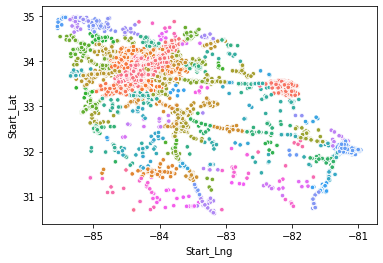

In [52]:
sns.scatterplot(x='Start_Lng', y='Start_Lat', data=df_ga, hue='County', legend=False, s=20)
plt.show()

In [29]:
county='Fulton'

df_area=df_ga.loc[df_ga.County==county].copy()
df_area.drop('County',axis=1, inplace=True)
df_area.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25568 entries, 141801 to 2180192
Data columns (total 32 columns):
Source                25568 non-null object
TMC                   25568 non-null float64
Severity              25568 non-null float64
Start_Lng             25568 non-null float64
Start_Lat             25568 non-null float64
Distance(mi)          25568 non-null float64
Side                  25568 non-null object
City                  25568 non-null object
Timezone              25568 non-null object
Temperature(F)        25568 non-null float64
Humidity(%)           25568 non-null float64
Pressure(in)          25568 non-null float64
Visibility(mi)        25568 non-null float64
Wind_Direction        25568 non-null object
Weather_Condition     25568 non-null object
Amenity               25568 non-null float64
Bump                  25568 non-null float64
Crossing              25568 non-null float64
Give_Way              25568 non-null float64
Junction              25568 non-nul

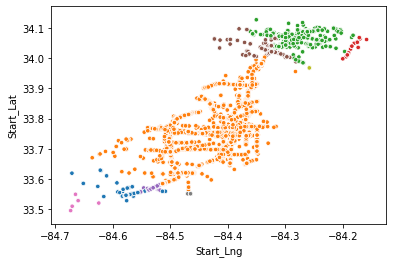

In [30]:
sns.scatterplot(x='Start_Lng', y='Start_Lat', data=df_area, hue='City', legend=False, s=20)
plt.show()

In [43]:
df_area_dummy = pd.get_dummies(df_area,drop_first=True)

df_area_dummy.info()
df_area_dummy.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25568 entries, 141801 to 2180192
Columns: 107 entries, TMC to Weekday_Wed
dtypes: float64(24), uint8(83)
memory usage: 6.9 MB


TMC  Severity  Start_Lng  Start_Lat  Distance(mi)  Temperature(F)  \
141801  245.0       3.0 -84.577347  33.546177          0.01            63.0   
141802  201.0       3.0 -84.527321  33.766376          0.01            63.0   
141803  229.0       3.0 -84.493134  33.786896          0.01            63.0   
141804  201.0       2.0 -84.418266  33.697849          0.01            63.0   
141805  201.0       3.0 -84.404984  33.696915          0.01            63.0   

        Humidity(%)  Pressure(in)  Visibility(mi)  Amenity  ...  \
141801         97.0         29.75             3.0      0.0  ...   
141802         90.0         29.73             3.0      0.0  ...   
141803         90.0         29.73             2.5      0.0  ...   
141804         97.0         29.77             9.0      0.0  ...   
141805         97.0         29.70            10.0      0.0  ...   

        Weather_Condition_Thunderstorm  \
141801                               0   
141802                               0   
141803                               0   
141804                               0   
141805                               0   

        Weather_Condition_Thunderstorms and Rain  \
141801                                         0   
141802                                         0   
141803                                         0   
141804                                         0   
141805                                         0   

        Weather_Condition_Wintry Mix  Sunrise_Sunset_Night  Weekday_Mon  \
141801                             0                     0            0   
141802                             0                     0            0   
141803                             0                     0            0   
141804                             0                     0            0   
141805                             0                     0            0   

        Weekday_Sat  Weekday_Sun  Weekday_Thu  Weekday_Tue  Weekday_Wed  
141801            0            0            0            0            1  
141802            0            0            0            0            1  
141803            0            0            0            0            1  
141804            0            0            0            0            1  
141805            0            0            0            0            1  

[5 rows x 107 columns]